In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Handling Missing values

- #### checking for missing values

In [5]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##### There are no null values in the data
##### But there can be placeholder values

- #### checking for placeholder values

In [6]:
placeholders = df.map(lambda x: x in ['???', 'Unknown'])
placeholders.any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

##### we can see that there are no placeholder values

#### Encoding Categorical Features

- ##### Ordinal Encoding
###### Applying ordinal Encoding on categorical variables such as Diet Quality and Physical Activity level to convert the categorical data into numerical data for getting menaingful order

In our dataset there are no ordinal features of data  

But there is nominal data [smoking_history ] and [gender] in the dataset


- #### One hot Encoding

In [7]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [8]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

encoded = encoder.fit_transform(df[['gender', 'smoking_history']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['gender', 'smoking_history']))

df = pd.concat([df.drop(['gender', 'smoking_history'], axis=1), encoded_df], axis=1)

df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,0,0,17.37,6.5,100,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,66.0,0,0,27.83,5.7,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,24.0,0,0,35.42,4.0,100,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(drop='first', sparse_output=False)
#new_columns = ['gender', 'smoking_history']
#encoded_df = pd.DataFrame(encoded_array, columns=new_columns)
#encoded_df

### Scaling Numerical Features

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

- #### Standard Scaling
  (Z-score Normalization)- Converts mean to 0 and SD to 1

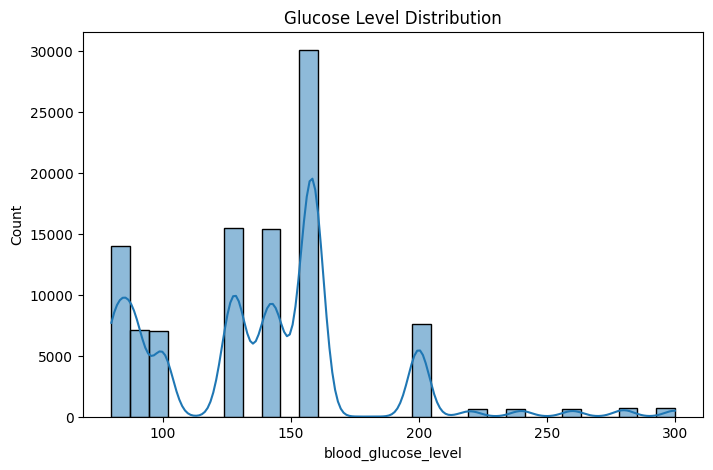

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 5))

# Reduce bins to smooth out the plot
sns.histplot(df['blood_glucose_level'], kde=True, bins=30, ax=ax)  
ax.set_title("Glucose Level Distribution")

plt.show()


we can see that blood_glucose_level has a lot of noise and distrubances in it so we must standardise the column

In [13]:
scaler = StandardScaler()

In [14]:
df['blood_glucose_level'] = scaler.fit_transform(df['blood_glucose_level'].values.reshape(-1,1))
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,0.047704,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,-1.426210,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,0.489878,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,0.416183,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,0.416183,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,-1.180558,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,0,0,17.37,6.5,-0.934905,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,66.0,0,0,27.83,5.7,0.416183,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,24.0,0,0,35.42,4.0,-0.934905,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- #### Min-Max Scaling

  Min-Max Scaling transforms numerical values to a fixed range, usually [0,1], while preserving the relative relationships between values.

In [15]:
scaler = MinMaxScaler()
df[['bmi', 'age']] = scaler.fit_transform(df[['bmi', 'age']])
encoded_df

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  float64
 6   diabetes                     100000 non-null  int64  
 7   gender_Male                  100000 non-null  float64
 8   gender_Other                 100000 non-null  float64
 9   smoking_history_current      100000 non-null  float64
 10  smoking_history_ever         100000 non-null  float64
 11  smoking_history_former       100000 non-null  float64
 12  smoking_history_never        100000 non-null  float64
 13  

### Handling Outliers

- #### IQR

In [17]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

outliers_iqr = detect_outliers_iqr(encoded_df)
for col, outlier_values in outliers_iqr.items():
    print(f"Outliers in {col}: {outlier_values.values}")


Outliers in gender_Male: []
Outliers in gender_Other: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Outliers in smoking_history_current: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_ever: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_former: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_never: []
Outliers in smoking_history_not current: [1. 1. 1. ... 1. 1. 1.]


In [18]:
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

outliers_iqr = detect_outliers_iqr(df)
for col, outlier_values in outliers_iqr.items():
    print(f"Outliers in {col}: {outlier_values.values}")


Outliers in age: []
Outliers in hypertension: [1 1 1 ... 1 1 1]
Outliers in heart_disease: [1 1 1 ... 1 1 1]
Outliers in bmi: [0.52159197 0.04645191 0.54178338 ... 0.58951914 0.41013072 0.35807656]
Outliers in HbA1c_level: [9.  9.  8.8 ... 9.  9.  8.8]
Outliers in blood_glucose_level: [2.99553263 3.9781421  3.48683736 ... 3.9781421  3.9781421  3.48683736]
Outliers in diabetes: [1 1 1 ... 1 1 1]
Outliers in gender_Male: []
Outliers in gender_Other: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Outliers in smoking_history_current: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_ever: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_former: [1. 1. 1. ... 1. 1. 1.]
Outliers in smoking_history_never: []
Outliers in smoking_history_not current: [1. 1. 1. ... 1. 1. 1.]


- #### Z-Score

In [19]:
from scipy import stats

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = stats.zscore(df[numeric_cols])
outliers_zscore = (np.abs(z_scores) > 3).sum(axis=0)

print(f"\nNumber of outliers by Z-score:\n{outliers_zscore}")



Number of outliers by Z-score:
[   0 7485 3942 1294 1315 1403 8500    0   18 9286 4004 9352    0 6447]


#### Winsorize for handling outliers in Insulin levels

In [20]:
from scipy.stats.mstats import winsorize

df['bmi'] = winsorize(df['bmi'], limits=[0.01, 0.01]) 
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.000000,0,1,0.177171,6.6,0.047704,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.674675,0,0,0.202031,6.6,-1.426210,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.349349,0,0,0.202031,5.7,0.489878,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.449449,0,0,0.156863,5.0,0.416183,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.949950,1,1,0.118231,4.8,0.416183,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.000000,0,0,0.202031,6.2,-1.180558,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.024024,0,0,0.085901,6.5,-0.934905,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.824825,0,0,0.207983,5.7,0.416183,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.299299,0,0,0.296569,4.0,-0.934905,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature Selection and Engineering

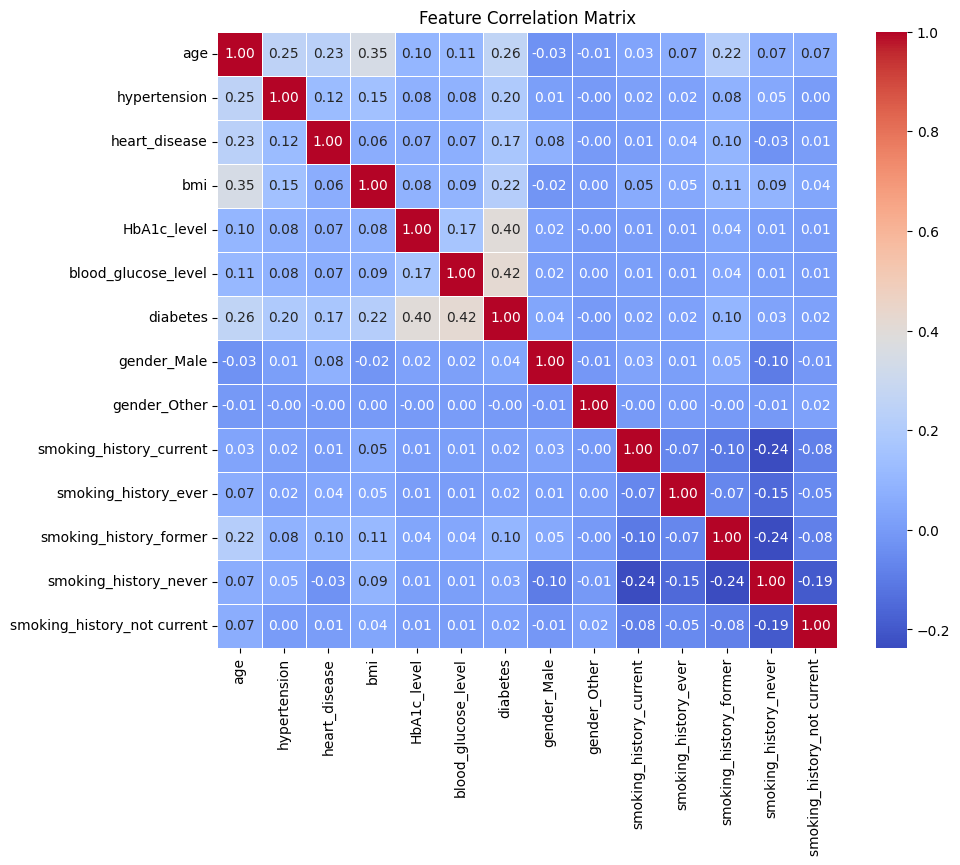


No highly correlated features found.


In [21]:

corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

threshold = 0.75
high_corr = [(i, j, corr_matrix.loc[i, j]) 
             for i in corr_matrix.columns 
             for j in corr_matrix.columns 
             if i != j and abs(corr_matrix.loc[i, j]) > threshold]

if high_corr:
    print("\nHighly correlated feature pairs:")
    for i, j, corr in high_corr:
        print(f"{i} and {j} → correlation = {corr:.2f}")
else:
    print("\nNo highly correlated features found.")


### Feature Selection

###### It is important to choose an optimal feature for modeling our data
###### This plays a key role in our model prediction 

In [22]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('diabetes', axis=1)
y = df['diabetes']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

print("\nFeature Importance:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")



Feature Importance:
HbA1c_level: 0.3981
blood_glucose_level: 0.3321
bmi: 0.1214
age: 0.1002
hypertension: 0.0145
heart_disease: 0.0101
gender_Male: 0.0062
smoking_history_never: 0.0049
smoking_history_former: 0.0040
smoking_history_current: 0.0031
smoking_history_not current: 0.0027
smoking_history_ever: 0.0025
gender_Other: 0.0000


### Train-Test Splitting

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((80000, 13), (20000, 13))

### Class Balancing

In [24]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

It is not balanced

#### Balancing the data using undersampling

In [25]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
nm1 = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = nm1.fit_resample(X, y)
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['diabetes'])], axis=1)
df_balanced.value_counts

<bound method DataFrame.value_counts of             age  hypertension  heart_disease       bmi  HbA1c_level  \
67423  0.612112             0              0  0.167484          6.5   
95697  0.019520             0              0  0.097923          5.0   
313    0.074074             0              0  0.202031          6.2   
93199  0.174174             0              0  0.132586          6.2   
49914  0.499499             0              0  0.202031          6.5   
...         ...           ...            ...       ...          ...   
99935  0.812312             1              1  0.274743          8.2   
99938  0.687187             0              1  0.238212          6.2   
99957  0.762262             0              0  0.285247          6.5   
99962  0.724725             1              0  0.330299          7.0   
99979  0.762262             0              0  0.234594          6.2   

       blood_glucose_level  gender_Male  gender_Other  \
67423             1.521618          0.0           

In [26]:
df_balanced['diabetes'].value_counts()

diabetes
0    8500
1    8500
Name: count, dtype: int64

<Axes: ylabel='count'>

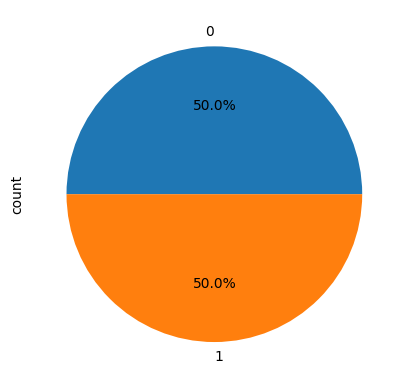

In [27]:
df_balanced['diabetes'].value_counts().plot.pie(autopct="%1.1f%%")

#### The data is balanced but its size reduced from 100000 to 17000